In [167]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageOps
from scipy import misc
from keras.models import load_model
from keras.datasets import mnist

In [155]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [156]:
model = load_model('mnist.h5')

In [157]:
normalize = np.vectorize(lambda x: 1 if x > 128 else 0)

In [175]:
raw = Image.open('real_data/(15,81).jpg')
raw_reversed = ImageOps.invert(raw)
raw_rev_resized = misc.imresize(raw_reversed, (28, 28))
normalized = normalize(raw_rev_resized)

In [159]:
# normalized[:,27] = 0

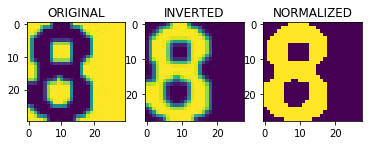

In [160]:
plt.subplot(131)
plt.title('ORIGINAL')
plt.imshow(raw)

plt.subplot(132)
plt.title('INVERTED')
plt.imshow(raw_rev_resized)

plt.subplot(133)
plt.title('NORMALIZED')
plt.imshow(normalized)

plt.show()

In [161]:
predictions = model.predict(np.array([normalized.flatten()]))

In [162]:
for (idx, pred) in enumerate(predictions[0]):
    print(str(idx) + ': ' + str(pred))

0: 0.0
1: 0.0
2: 3.84866e-23
3: 1.0
4: 0.0
5: 2.56836e-25
6: 0.0
7: 7.69549e-15
8: 2.95655e-32
9: 8.27073e-32


In [128]:
max(predictions[0])

1.0

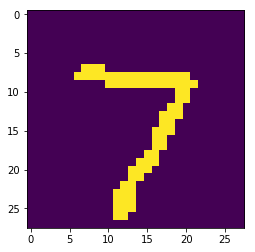

0: 4.43138e-17
1: 5.12485e-17
2: 7.24165e-11
3: 3.71337e-08
4: 4.20239e-23
5: 6.03738e-15
6: 2.24253e-26
7: 1.0
8: 2.57007e-15
9: 8.87119e-13


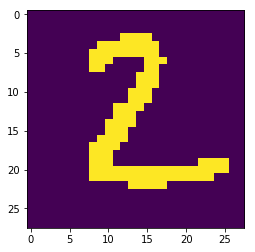

0: 4.31185e-16
1: 3.18256e-13
2: 1.0
3: 1.60371e-16
4: 1.28346e-31
5: 2.61144e-17
6: 8.95729e-21
7: 2.30632e-24
8: 1.79965e-18
9: 2.32532e-26


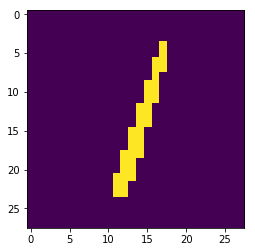

0: 2.4113e-12
1: 0.999978
2: 4.29154e-09
3: 8.50371e-11
4: 1.49667e-07
5: 2.29376e-10
6: 2.63052e-09
7: 2.07952e-05
8: 1.14499e-06
9: 5.09404e-10


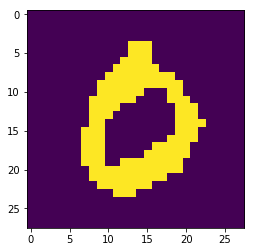

0: 1.0
1: 3.16461e-14
2: 2.22048e-07
3: 6.54967e-13
4: 1.74367e-12
5: 4.46356e-10
6: 3.68179e-09
7: 3.7137e-09
8: 7.24371e-13
9: 2.71826e-10


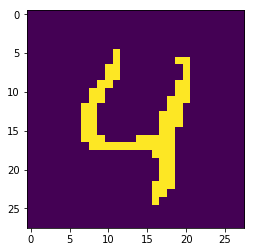

0: 1.37922e-11
1: 3.7192e-22
2: 1.0722e-13
3: 1.54333e-18
4: 0.999997
5: 2.39991e-18
6: 5.55042e-13
7: 1.51749e-07
8: 1.46903e-14
9: 2.5833e-06


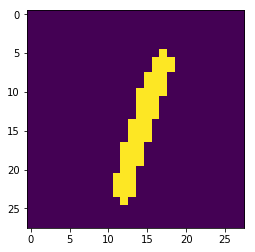

0: 1.36723e-14
1: 0.999977
2: 1.24043e-12
3: 5.63722e-12
4: 6.40409e-08
5: 2.36442e-14
6: 6.07386e-13
7: 2.24041e-05
8: 1.27484e-08
9: 2.1438e-11


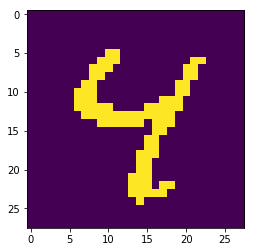

0: 1.71163e-18
1: 1.06173e-16
2: 8.17316e-15
3: 2.61916e-13
4: 0.996884
5: 4.74504e-09
6: 6.67353e-12
7: 4.37513e-08
8: 0.000169208
9: 0.00294708


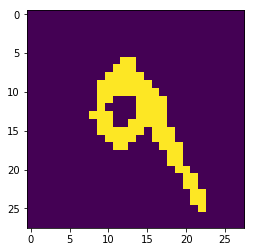

0: 1.85946e-10
1: 1.34531e-10
2: 1.58478e-07
3: 2.50226e-05
4: 3.51358e-06
5: 1.51737e-06
6: 1.25323e-13
7: 3.23667e-07
8: 1.98021e-08
9: 0.999969


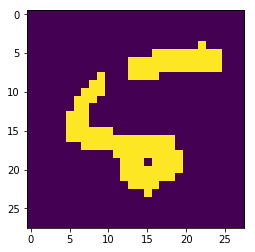

0: 1.441e-12
1: 7.2367e-23
2: 9.69476e-14
3: 2.62043e-13
4: 1.16247e-14
5: 0.00818948
6: 0.991811
7: 5.97339e-14
8: 7.94643e-11
9: 9.01015e-09


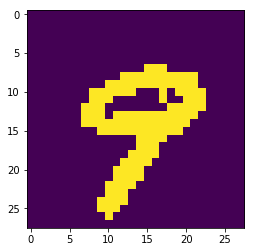

0: 6.4877e-16
1: 3.1481e-15
2: 1.62071e-15
3: 7.99481e-09
4: 8.98818e-05
5: 9.70978e-10
6: 2.51611e-15
7: 1.04671e-05
8: 1.96489e-06
9: 0.999898


In [163]:
# for i in range(0, 10):
#     sth = normalize(x_test[i])

#     plt.imshow(sth)
#     plt.show()

#     predictions = model.predict(np.array([sth.flatten()]))
#     for (idx, pred) in enumerate(predictions[0]):
#         print(str(idx) + ': ' + str(pred))

In [166]:
# for i in range(0, 100):
#     if y_train[i] == 8:
#         plt.imshow(normalize(x_train[i]))
#         plt.show()

In [177]:
class Model:
    def load(self, model_path):
        self.model = load_model(model_path)
        
    def predict(self, img, debug=False):
        img_vec = Model.__to_vector(img)
        predictions = self.model.predict(np.array([img_vec]))
        if (debug):
            for i, p in enumerate(predictions[0]):
                print(str(i + 1) + ' --> ' + str(p))
        return np.argmax(predictions, axis=1)[0] + 1
    
    @staticmethod
    def __to_vector(image):
        normalize = np.vectorize(lambda x: 1 if x > 128 else 0)
        return normalize(np.array(image)).flatten()

In [178]:
m = Model()

In [179]:
m.load('grea.h5')

In [180]:
m.predict(raw)

8